# Random Forest Analysis on Airline Customer Satisfaction

## **Introduction**


Random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This project is a continuation of the project I began modeling with decision trees for an airline. Here, I'll train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. The random forest model will be used to predict whether a customer will be satisfied with their flight experience.


## **Step 1: Imports** 


Importing relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing, the `pickle` package to save the model, and the `matplotlib.pyplot` for data visualization and plotting, and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV` 
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, `accuracy_score`, `confusion_matrix`, and `ConfusionMatrixDisplay`



In [172]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.

 
import numpy as np
import pandas as pd

import pickle as pkl

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [48]:
# RUN THIS CELL TO IMPORT THE DATA. 
air_data = pd.read_csv("Invistico_Airline.csv")

## **Step 2: Data cleaning** 

Displaying the first 10 rows.

In [51]:
# Display first 10 rows.

air_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Displaying the variable names and their data types. 

In [53]:
# Display variable names and types.

air_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

- There are three types of variables included in the data: int64, float64, and object. The object variables are satisfaction, customer type, type of travel, and class. 

Identifying the number of rows and the number of columns.

In [56]:
# Identify the number of rows and the number of columns.

air_data.shape

(129880, 22)

Checking for missing values in the rows of the data. Starting with .isna() to get Booleans indicating whether each value in the data is missing. Then, using .any(axis=1) to get Booleans indicating whether there are any missing values along the columns in each row. Finally, using .sum() to get the number of rows that contain missing values.

In [58]:
# Get Booleans to find missing values in data.
# Get Booleans to find missing values along columns.
# Get the number of rows that contain missing values.

air_data.isna().any(axis =1).sum()

393

- There are 393 rows in air_data that contain at least one missing value.

Dropping the rows with missing values. This is an important step in data cleaning, as it makes the data more useful for analysis and regression. Then, saving the resulting pandas DataFrame in a variable named `air_data_subset`.

In [61]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.

air_data_subset = air_data.dropna(axis = 0)

Displaying the first 10 rows to examine the data subset.

In [63]:
# Display the first 10 rows.

air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Confirming that it doesn't contain any missing values.

In [65]:
# Count of missing values.

air_data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Converting the categorical features to indicator (one-hot encoded) features. 


In [67]:
# Convert categorical features to one-hot encoded features.

air_data_subset_dummies = pd.get_dummies(air_data_subset, columns=['Customer Type','Type of Travel','Class'])

It is necessary to convert categorical data into dummy variables because the sklearn implementation of RandomForestClassifier() requires that categorical features be encoded to numeric, which can be done using dummy variables or one-hot encoding.

Displaying the first 10 rows to review the `air_data_subset_dummies`. 

In [70]:
# Display the first 10 rows.

air_data_subset_dummies.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,True,False,False,True,False,True,False
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,True,False,False,True,True,False,False
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,True,False,False,True,False,True,False
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,True,False,False,True,False,True,False
5,satisfied,30,1894,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
6,satisfied,66,227,0,0,0,3,2,5,5,...,3,17,15.0,True,False,False,True,False,True,False
7,satisfied,10,1812,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
8,satisfied,56,73,0,0,0,3,5,3,5,...,4,0,0.0,True,False,False,True,True,False,False
9,satisfied,22,1556,0,0,0,3,2,0,2,...,2,30,26.0,True,False,False,True,False,True,False


Checking the variables of air_data_subset_dummies.

In [72]:
# Display variables.
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer            bool
Customer Type_disloyal Customer         bool
Type of Travel_Business travel          bool
Type of Tr

All of the following changes could be observed after converting the string data to dummy variables: 

- Customer Type  -->  Customer Type_Loyal Customer and Customer Type_disloyal Customer
- Type of Travel -->  Type of Travel_Business travel and Type of Travel_Personal travel 
- Class          --> Class_Business, Class_Eco, Class_Eco Plus

## **Step 3: Model building** 

The first step to building the model is separating the labels (y) from the features (X).

In [76]:
# Separate the dataset into labels (y) and features (X).

y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies.drop("satisfaction", axis=1)

Splitting the data into train, validate, and test sets. 

In [78]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
X_tr, X_vali, y_tr, y_vali = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

### Tuning the model

Now, I will fit and tune a random forest model using a separate validation set. I'll start by defining a set of hyperparameters to optimize the model with GridSearchCV.

In [80]:
# Determine set of hyperparameters.

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],  
             
#If min_samples_leaf is 0.5, a leaf node must have at least 50% of the total number of samples in the parent node.
              'min_samples_leaf' : [0.5,1], 
             
#If min_samples_split is 0.001, 
#a node must have at least 0.1% of the total number of samples in the parent node to be considered for splitting.
              'min_samples_split' : [0.001, 0.01],
         'max_features' : ["sqrt"], 
             
#number of samples that can be drawn from the original dataset to create each bootstrap sample.             
          'max_samples' : [.5,.9]}

Creating a list of split indices.

In [82]:
# Create list of split indices.

split_indices = [0 if x in X_vali.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_indices)

#The code creates a custom train-validation split within X_train by marking indices in split_indices as 0 for validation
#and -1 for training. This allows PredefinedSplit to perform cross-validation with a fixed validation set (X_vali).

Instantiating the model.

In [84]:
# Instantiate model.
rnd_forest = RandomForestClassifier(random_state = 0)

Using GridSearchCV to search over the specified parameters.

In [86]:
# Search over specified parameters.

rnd_forest_val = GridSearchCV(rnd_forest,cv_params, cv = custom_split, refit = 'f1',
                              
                              #Enables parallel processing, which can speed up the grid search process.
                              n_jobs = -1,
                              
#Enables verbose output, providing progress messages and information about the grid search.
                              verbose = 1)

Fitting the model.

In [88]:
%%time
# Fit the model.
rnd_forest_val.fit(X_train,y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 3.3 s, sys: 289 ms, total: 3.59 s
Wall time: 16.9 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

Obtaining the optimal parameters.

In [90]:
# Obtain optimal parameters.
rnd_forest_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

## **Step 4: Results and evaluation** 

Using the selected model to predict on the test data. Using the optimal parameters found via GridSearchCV.

In [93]:
# Use optimal parameters on GridSearchCV.

rnd_forest_opt = RandomForestClassifier(max_depth= 50,max_features= 'sqrt',max_samples= 0.9,min_samples_leaf= 1,min_samples_split= 0.001,
 n_estimators= 50, random_state = 0)

#max_features='sqrt' means that at each split in a decision tree,
#the model will consider only the square root of the total number of features as candidates for splitting.

# Also we can use: rnd_forest_opt = rnd_forest_val.best_estimator_

Fitting the optimal model.

In [95]:
# Fit the optimal model.
rnd_forest_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

Predicting on the test set using the optimal model.

In [97]:
# Predict on test set.
y_predict = rnd_forest_opt.predict(X_test)

### Obtaining the performance scores

In [99]:
# Get precision score.
precision = precision_score(y_test, y_predict, pos_label = 'satisfied')

# Get recall score.
recall = recall_score(y_test, y_predict,pos_label = 'satisfied')

# Get accuracy score.
accuracy = accuracy_score(y_test, y_predict)

# Get F1 score.
f1_score = f1_score(y_test, y_predict, pos_label = 'satisfied')

**Pros of using test data for model selection:**

Simplicity: It's a straightforward approach that doesn't require additional data splitting.

Direct evaluation: We get a direct assessment of the model's performance on the final dataset.

**Cons of using test data for model selection:**

Overfitting: If we tune the model's hyperparameters directly on the test data, there's a risk of overfitting, where the model becomes too specialized to the test data and performs poorly on new, unseen data.

Biased evaluation: Using the test data for both tuning and final evaluation can introduce bias into the assessment, as the model might be tailored specifically to that particular dataset.




### Evaluating the model

Calculating the scores: precision score, recall score, accuracy score, F1 score.

In [103]:
# Precision score on test data set.
print("\nThe precision score is: {pc:.3f}".format(pc=precision), "for the test set,", "\nwhich means of all positive predictions,", "{pc_pct:.1f}% prediction are true positive.".format(pc_pct=precision * 100))


The precision score is: 0.951 for the test set, 
which means of all positive predictions, 95.1% prediction are true positive.


In [104]:
# Recall score on test data set.
print("\nThe recall score is: {rc:.3f}".format(rc = recall), "for the test set,", "\nwhich means of which means of all real positive cases in test set,", "{rc_pct:.1f}% are  predicted positive.".format(rc_pct = recall * 100))


The recall score is: 0.945 for the test set, 
which means of which means of all real positive cases in test set, 94.5% are  predicted positive.


In [105]:
# Accuracy score on test data set.
print("\nThe accuracy score is: {ac:.3f}".format(ac = accuracy), "for the test set,", "\nwhich means of all cases in test set,", "{ac_pct:.1f}% are predicted true positive or true negative.".format(ac_pct = accuracy * 100))


The accuracy score is: 0.943 for the test set, 
which means of all cases in test set, 94.3% are predicted true positive or true negative.


In [106]:
# F1 score on test data set.
print("\nThe F1 score is: {f1:.3f}".format(f1 = f1_score), "for the test set,", "\nwhich means the test set's harmonic mean is {f1_pct:.1f}%.".format(f1_pct = f1_score * 100))


The F1 score is: 0.948 for the test set, 
which means the test set's harmonic mean is 94.8%.


### Producing a confusion matrix

Producing a confusion matrix to know the types of errors made by the algorithm.

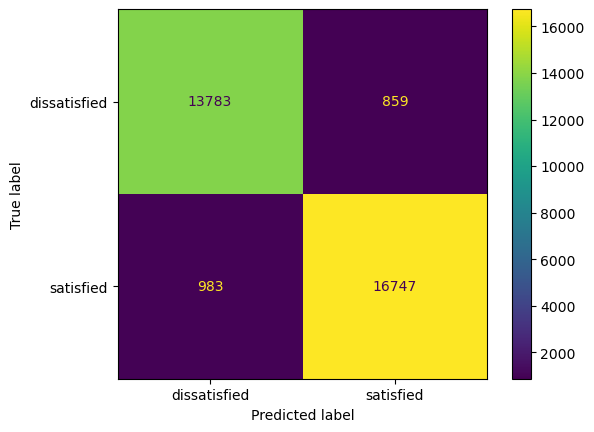

In [160]:
# Generate a confusion matrix using the true labels (y_test) and the predicted labels (dt_pred)
# The 'labels' parameter ensures the confusion matrix is ordered by the class labels in the rnd_forest_opt
cm = confusion_matrix(y_test, y_predict, labels = rnd_forest_opt.classes_)

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =  rnd_forest_opt.classes_)

# Plot the confusion matrix using the display object
disp.plot()

**The interpretaion of the confusion matrix:**

- **True Positives (TP): `16,747`**
This represents the number of customers correctly predicted as satisfied. In this case, 16,747 customers who were actually satisfied were predicted to be satisfied by the model.

- **False Positives (FP): `859`**
This indicates the number of customers incorrectly predicted as satisfied. These are customers who were predicted to be satisfied but were actually unsatisfied, showing a risk of misidentifying unsatisfied customers as satisfied.

- **True Negatives (TN): `13,783`**
This represents the number of customers correctly predicted as unsatisfied. Thus, 13,783 customers who were indeed unsatisfied were accurately predicted to be unsatisfied by the model.

- **False Negatives (FN): `983`**
This represents the number of customers incorrectly predicted as unsatisfied. These are customers who were predicted to be unsatisfied but were actually satisfied, which can lead to overlooking satisfied customers who may contribute positively to the airline's reputation and future business.


### Feature importance bar plot

Creating a bar plot to visualize the feature importances.

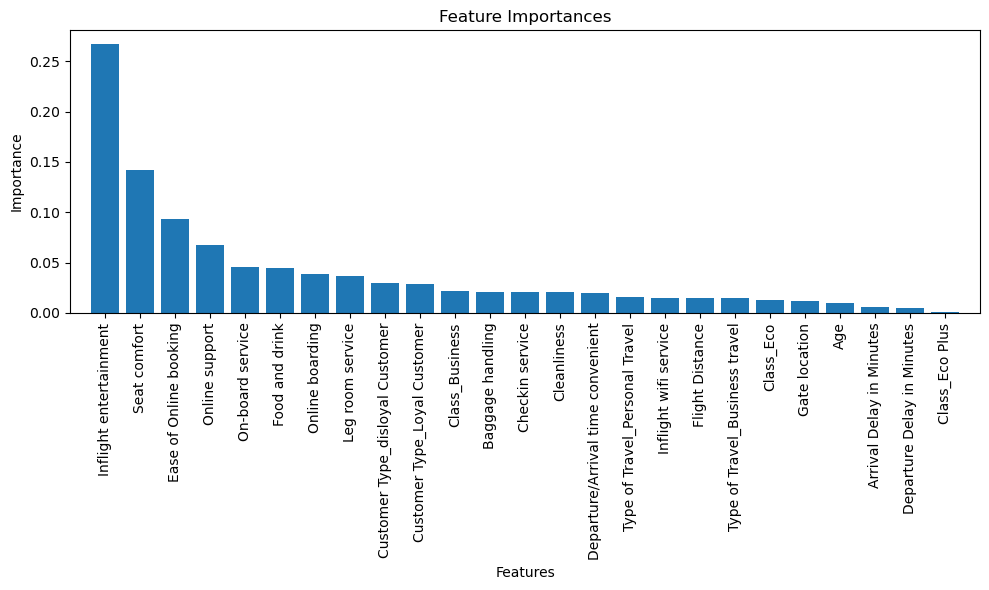

In [174]:
importances = rnd_forest_opt.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

 **Key features identified:**
1. In-flight Entertainment
2. Seat Comfort
3. Ease of Online Booking

These features had the highest importance scores, indicating a strong influence on customer satisfaction.


### Evaluating the model
Finally, creating a table of results that I can use to evaluate the performace of the "Tuned Decision Tree" and the "Tuned Random Forest".

In [108]:
# Create table of results.

evaluation_df = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest"],
                        'F1':  [0.945422, f1_score],
                        'Recall': [0.935863, recall],
                        'Precision': [0.955197, precision],
                        'Accuracy': [0.940864, accuracy]
                      }
                    )
evaluation_df

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947872,0.944557,0.951210,0.943099


- The tuned random forest has higher scores overall, so it is the better model. Particularly, it shows a better F1 score than the decision tree model, which indicates that the random forest model may do better at classification when taking into account false positives and false negatives.


## Conclusion

**Key Insights**
- **High Model Accuracy:** The random forest model achieved `94.3%` `accuracy` and `94.8%` `f1-score` , showing strong predictive power in identifying customer satisfaction.
- **Influential Features:** `In-flight Entertainment`, `Seat Comfort`, and `Ease of Online Booking` are the top drivers of satisfaction based on feature importance analysis.
- **Model Comparison:** The tuned random forest model demonstrated higher overall scores than the decision tree, particularly with a superior F1 score, indicating better classification performance while accounting for false positives and false negatives.
- **Enhanced Model Performance:** The tuned random forest model outperformed the decision tree across various metrics:

   | Model                  | F1 Score | Recall     | Precision  | Accuracy   |
   |-----------------------|----------|------------|------------|------------|
   | Tuned Decision Tree    | 0.945422 | 0.935863   | 0.955197   | 0.940864   |
   | Tuned Random Forest    | 0.947872 | 0.944557   | 0.951210   | 0.943099   |

**Interpretation of Findings**
- **Satisfaction Prediction:** The model’s high accuracy and balanced performance metrics suggest it is effective for operational use in predicting customer satisfaction.
- **In-flight Entertainment’s Impact:** A high score in `In-flight Entertainment` strongly predicts customer satisfaction, emphasizing its importance for customers and validating potential service investments in this area.

**Summary for Stakeholders**
1. **In-flight Entertainment Focus:** Customers with higher satisfaction ratings tended to score in-flight entertainment highly. Prioritizing enhancements in this area could yield a direct increase in customer satisfaction, as the data suggests a strong correlation.
  
2. **Seat Comfort and Online Booking Ease:** These features also significantly impact satisfaction. Ensuring comfortable seating and an easy booking process can enhance customer perception, especially for high-frequency or long-distance travelers who prioritize comfort and convenience.

3. **Strategic Model Use:** With its high accuracy, this model could be incorporated into customer relationship management (CRM) systems to proactively target customers likely to be unsatisfied and gather feedback or offer incentives to improve their experience. 

4. **Enhanced Model Performance:** The tuned random forest model may provide better classification performance than the decision tree, making it a preferred choice for predicting customer satisfaction.


### References

[What is the Difference Between Test and Validation Datasets?,  Jason Brownlee](https://machinelearningmastery.com/difference-test-validation-datasets/)

[Decision Trees and Random Forests Neil Liberman](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

In [186]:
import json

# Load the notebook file
with open("Activity_Build a random forest model.ipynb", "r", encoding="utf-8") as f:
    notebook = json.load(f)

# Iterate over all cells and extract markdown cells
markdown_cells = []
for cell in notebook['cells']:
    if cell['cell_type'] == 'markdown':
        markdown_cells.append(''.join(cell['source']))

# Print or copy all markdown cells
for i, md in enumerate(markdown_cells):
    print(f"Markdown Cell {i+1}:\n{md}\n")


Markdown Cell 1:
# Random Forest Analysis on Airline Customer Satisfaction

Markdown Cell 2:
## **Introduction**


Random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This project is a continuation of the project I began modeling with decision trees for an airline. Here, I'll train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. The random forest model will be used to predict whether a customer will be satisfied with their flight experience.


Markdown Cell 3:
## **Step 1: Imports** 


Markdown Cell 4:
Importing relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing, the `pickle` package to save the model, and the `matplotlib.pyplot` for data visualization and plotting, and the `sklearn` libra